# 📊 Actividad: EDA y Modelado con Regresión Lineal y Logística
**Estudiante:** TU NOMBRE AQUÍ  
**Fecha:** AAAA-MM-DD  
**Dataset:** House Prices - Advanced Regression Techniques

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor, SGDClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar datos
# Replace 'data/train.csv' with the correct path to your train.csv file
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 🔍 1. EDA Básico

In [4]:
df.info()
df.describe()
df.isnull().sum().sort_values(ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


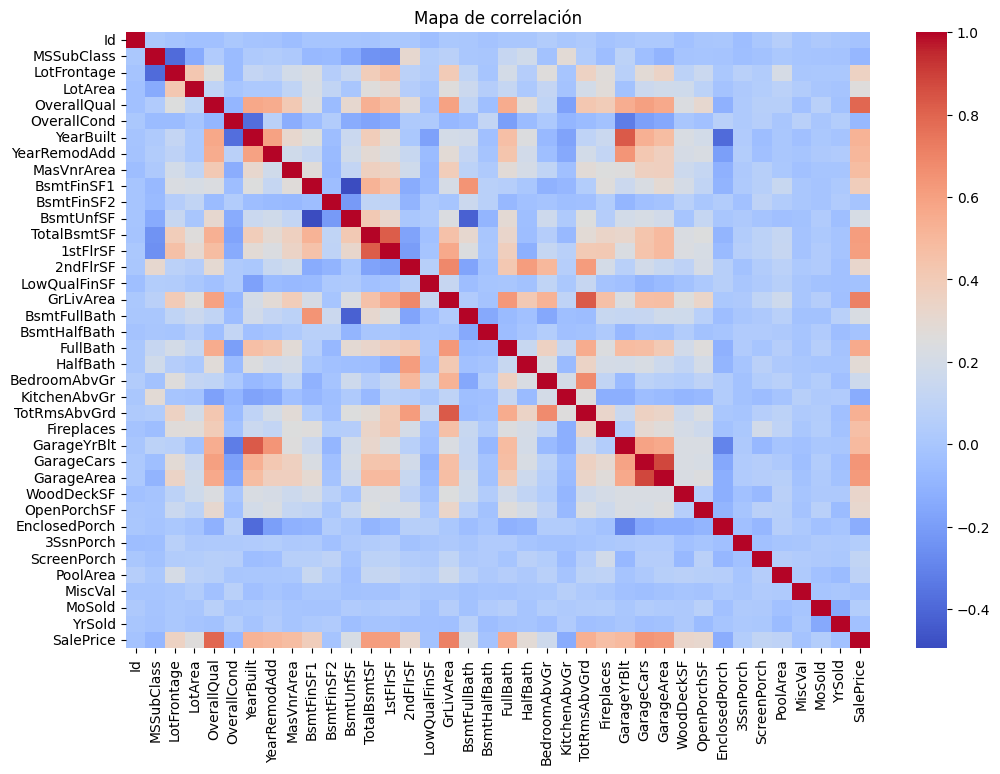

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title('Mapa de correlación')
plt.show()

## 📈 2. Regresión Lineal

In [6]:
features = ['GrLivArea', 'OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GarageCars']
X = df[features]
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
pd.Series(lr.coef_, index=features)

R²: 0.7938653966356527
MAE: 25414.725402852247
RMSE: 39763.29526578094


,0
GrLivArea,48.809801
OverallQual,20392.513001
YearBuilt,315.923350
TotalBsmtSF,25.365319
GarageCars,15144.237204


## ⚙️ 3. Regresión Lineal con Gradiente Descendente

In [7]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train, y_train)
y_pred_sgd = sgd_reg.predict(X_test)
print("SGD - R²:", r2_score(y_test, y_pred_sgd))
print("SGD - MAE:", mean_absolute_error(y_test, y_pred_sgd))
print("SGD - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sgd)))

SGD - R²: -1.562443259628159e+20
SGD - MAE: 892075532591680.0
SGD - RMSE: 1094735104103670.6


## 🧪 4. Regresión Logística

In [8]:
df['HighPrice'] = (df['SalePrice'] > df['SalePrice'].mean()).astype(int)
X_cls = df[features]
y_cls = df['HighPrice']
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_cls, y_train_cls)
y_pred_log = logreg.predict(X_test_cls)
print("Accuracy:", accuracy_score(y_test_cls, y_pred_log))
print("F1 Score:", f1_score(y_test_cls, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_log))

Accuracy: 0.934931506849315
F1 Score: 0.909952606635071
Confusion Matrix:
 [[177   8]
 [ 11  96]]


## 🔁 5. Clasificador con Gradiente Descendente

In [9]:
sgd_cls = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_cls.fit(X_train_cls, y_train_cls)
y_pred_sgd_cls = sgd_cls.predict(X_test_cls)
print("SGD - Accuracy:", accuracy_score(y_test_cls, y_pred_sgd_cls))
print("SGD - F1 Score:", f1_score(y_test_cls, y_pred_sgd_cls))
print("SGD - Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_sgd_cls))

SGD - Accuracy: 0.815068493150685
SGD - F1 Score: 0.7954545454545454
SGD - Confusion Matrix:
 [[133  52]
 [  2 105]]


## 🧠 6. Conclusión reflexiva

- ¿Qué variables influyeron más en los modelos y por qué?
- ¿Qué diferencias observaste entre modelos clásicos y los que usan gradiente descendente?
- ¿Qué mejorarías en un próximo análisis?

In [10]:
# Si usas Otter-Grader
# import otter
# otter.Notebook().export('eda_modelado_regresion.ipynb')